In [46]:
# define error and plot fns
def RMSE(y_test, y_predict):
    RMSE = (sum((y_predict - y_test)**2)/len(y_test))**0.5
    return RMSE

def plot_predict(y_test, y_predict):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    
    ax.scatter(y_test, y_predict, alpha = 0.5)
    ax.plot(np.linspace(np.min(y_test), np.max(y_test), 2), np.linspace(np.min(y_test), np.max(y_test), 2), 'r--')
    ax.set_xlabel('y_test', fontsize = 20)
    ax.set_ylabel('y_predict', fontsize = 20)   
    #ax.set_aspect("equal")
    ax.set_title(('RMSE = ' + str(RMSE(y_test, y_predict)) + '| RSquared = ' + str(calc_RSquared(y_test, y_predict))), fontsize = 20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
def calc_RSquared(y_test, y_predict):
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    SS_res = np.sum((y_test - y_predict)**2)
    return (1 - SS_res/SS_total)

In [234]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


In [289]:
df = pd.read_csv('2013_movies.csv')
df = df.dropna()
df['const'] = 1

In [175]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,const
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1


In [306]:
# ex3.1 

from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits = 4)

for train_index, test_index in kf.split(df):
    X = np.array(df[['const']])
    y = np.array(df[['Runtime']])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]

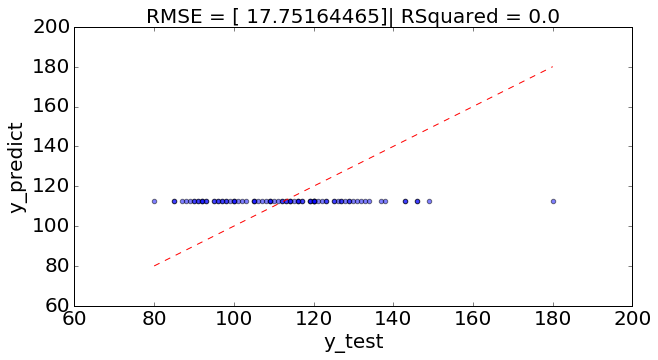

In [307]:
%matplotlib inline
lr = LinearRegression()
lr.fit(X, y)
plot_predict(y, lr.predict(X))

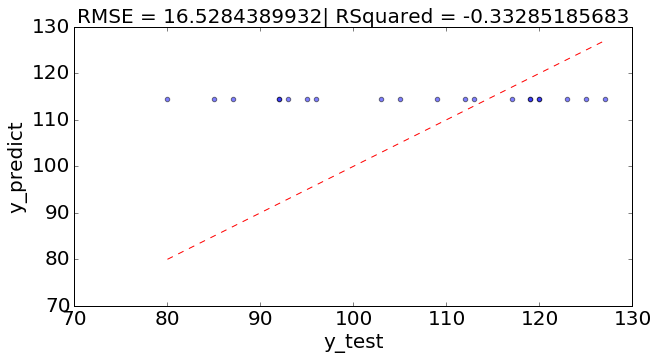

In [309]:
# ex3.1 alternate Define the model
lm1 = smf.ols('Runtime ~ const', data = df_train)

# Fit the model
fit1 = lm1.fit()

#fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1)
# Print summary statistics of the model's performance
fit1.summary()

plot_predict(df_test['Runtime'], fit1.predict(df_test))

In [253]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        16:12:29   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.222e+07    6.5e+06      3.418      0.001      9.29e+06  3.51e+07
const       2.222e+07    6.5e+06      3.418      0.001      9.29e+06  3.51e+07
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.66e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(array([ 37.,  21.,  14.,   3.,   3.,   3.,   2.,   0.,   1.,   3.]),
 array([ -7.79470246e+07,  -3.80370450e+07,   1.87293456e+06,
          4.17829142e+07,   8.16928938e+07,   1.21602873e+08,
          1.61512853e+08,   2.01422833e+08,   2.41332812e+08,
          2.81242792e+08,   3.21152771e+08]),
 <a list of 10 Patch objects>)

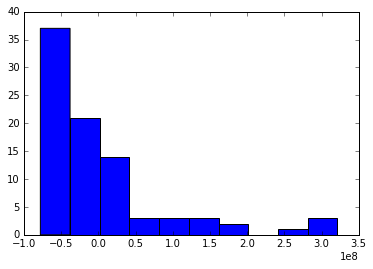

In [178]:
residual = y - lr.predict(X)
plt.hist(residual)

In [310]:
# ex3.2 use a continuous predictor 

from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits = 4)
df = df.dropna()
for train_index, test_index in kf.split(df):
    X = np.array(df[['Budget']])
    y = np.array(df['Runtime'])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]

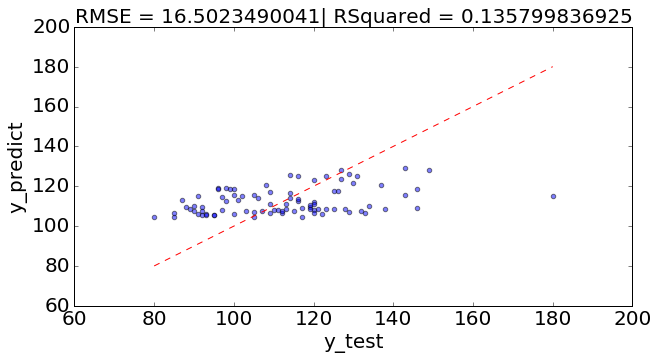

In [311]:
%matplotlib inline
lr = LinearRegression()
lr.fit(X, y)
plot_predict(y, lr.predict(X))

(array([  9.,  15.,  19.,   8.,   7.,   8.,   4.,   7.,   4.,   6.]),
 array([ -8.06465149e+07,  -6.04073086e+07,  -4.01681022e+07,
         -1.99288959e+07,   3.10310463e+05,   2.05495168e+07,
          4.07887231e+07,   6.10279295e+07,   8.12671358e+07,
          1.01506342e+08,   1.21745548e+08]),
 <a list of 10 Patch objects>)

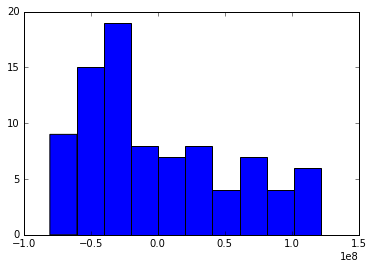

In [271]:
residual = y - lr.predict(X)
plt.hist(residual)

In [313]:
# ex3.3 add categorical variables
# df['PG13'] = 0
df['PG13'] = df['Rating'].apply(lambda x : 1 if x == 'PG-13' else 0)

In [314]:
# ex3.3 use categorical variables

from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits = 5)
df = df.dropna()
for train_index, test_index in kf.split(df):
    X = np.array(df[['PG13']])
    y = np.array(df['Runtime'])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]

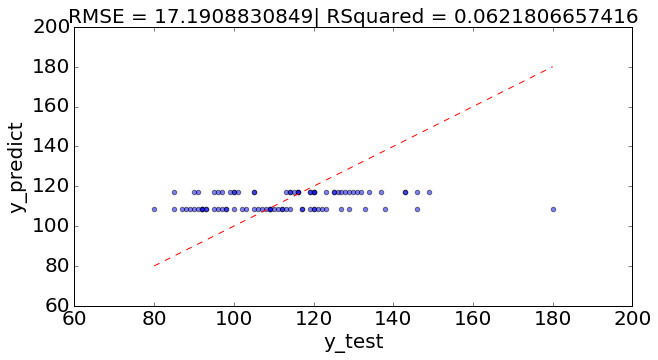

In [315]:
%matplotlib inline
lr = LinearRegression()
lr.fit(X, y)
plot_predict(y, lr.predict(X))

In [316]:
# ex3.4 add more features

from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits = 5)
df = df.dropna()
for train_index, test_index in kf.split(df):
    X = np.array(df[['PG13', 'Budget']])
    y = np.array(df['Runtime'])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]

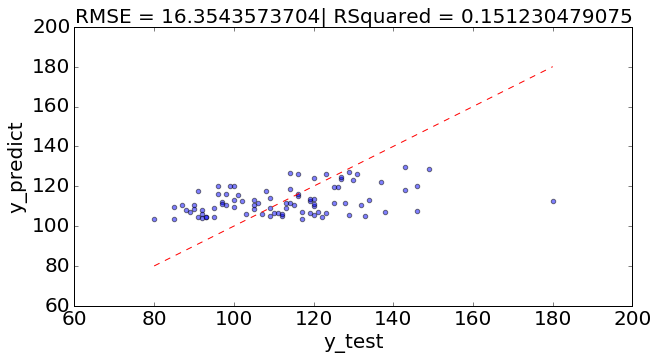

In [317]:
%matplotlib inline
lr = LinearRegression()
lr.fit(X, y)
plot_predict(y, lr.predict(X))

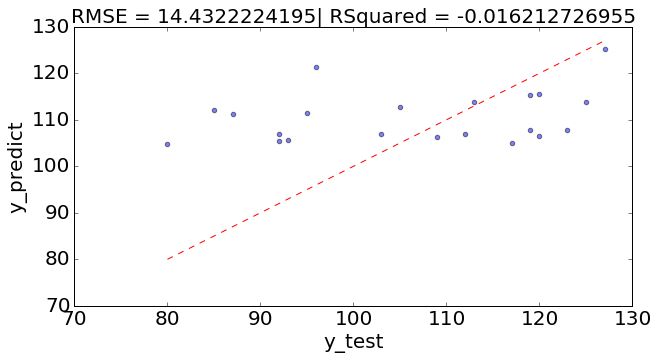

In [322]:
# ex3.5 train test

from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits = 4)
df = df.dropna()
for train_index, test_index in kf.split(df):
    X = np.array(df[['PG13', 'Budget']])
    y = np.array(df['Runtime'])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]
    
    %matplotlib inline
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    plot_predict(y_test, lr.predict(X_test))

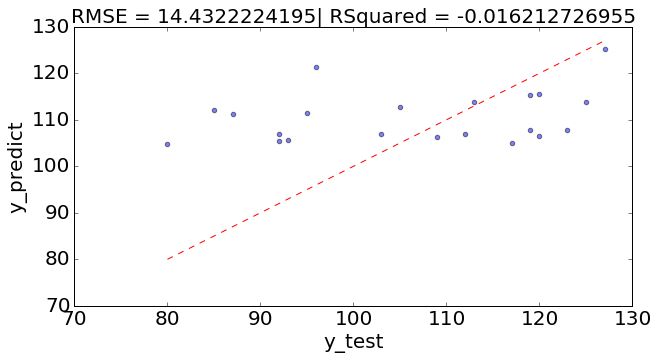

In [321]:
%matplotlib inline
lr = LinearRegression()
lr.fit(X_train, y_train)
plot_predict(y_test, lr.predict(X_test))